In [80]:
import pandas as pd
import os
import json

In [81]:
%pip install chardet

Note: you may need to restart the kernel to use updated packages.


# Grans centres comercials de la ciutat de Barcelona

In [90]:
import chardet 
with open('mercats-centrescomercials_grans-centres-comercials.csv', 'rb') as file:     
    raw_data = file.read()     
    result = chardet.detect(raw_data)     
    encoding = result['encoding']     
    confidence = result['confidence']  
encoding

'UTF-16'

In [91]:
df = pd.read_csv('mercats-centrescomercials_grans-centres-comercials.csv', encoding="UTF-16")

In [88]:
df.sample

<bound method NDFrame.sample of      register_id                                               name  \
0   ﻿98096114839                         Fira d'Artesans Nou Barris   
1   ﻿96092130232                  Mostra d'Art *Pl Sant Josep Oriol   
2   ﻿96093124226  Mostra de Pintors Afeccionats *Pl Sagrada Família   
3   ﻿96092125659               Mercat Gòtic Antiguitats *Plaça Nova   
4   ﻿96092131636  Fira del Col·lectiu d'Artesans d'Alimentació *...   
5   ﻿96093122603                      Mostra d'Art *Plaça de Sarrià   
6   ﻿96058200711              'Mercadillo' de la Marina-Zona Franca   
7   ﻿96058201233     Mercat de Numismàtica i Filatèlia *Plaça Reial   
8   ﻿99400213409        Fira d'Embotits Artesanals *Plaça de Sarrià   
9   ﻿95191112500                  Mercat de Pins *Pg Lluís Companys   
10  ﻿98187143140                         Petit Mercat de Provençals   
11  ﻿97094130710               Fira de Llibre Vell *Plaça de Sarrià   
12  ﻿99400164981                    Fira d'Ar

In [92]:
df.head()

,register_id,name,institution_id,institution_name,created,modified,addresses_roadtype_id,addresses_roadtype_name,addresses_road_id,addresses_road_name,...,values_description,secondary_filters_id,secondary_filters_name,secondary_filters_fullpath,secondary_filters_tree,secondary_filters_asia_id,geo_epgs_25831_x,geo_epgs_25831_y,geo_epgs_4326_x,geo_epgs_4326_y
0,﻿1256130510,Centre Comercial Som Multiespai,NaN,NaN,2001-09-13T00:00:00+02:00,2023-02-15T12:38:40.782658+01:00,NaN,NaN,282650,Av Rio de Janeiro,...,NaN,58731071,Grans centres comercials,Planol BCN >> Mercats i centres comercials >> ...,651,65103005000003,431579.011941,4.587385e+06,41.435125,2.181042
1,﻿1313140637,Centre Comercial Diagonal Mar,NaN,NaN,2001-11-09T00:00:00+01:00,2022-09-17T02:32:26.048178+02:00,NaN,NaN,144601,Av Diagonal,...,NaN,58731071,Grans centres comercials,Planol BCN >> Mercats i centres comercials >> ...,651,65103005000003,434510.209033,4.584620e+06,41.410457,2.216423
2,﻿95111123350,Hipermercat Carrefour *Glòries,NaN,NaN,1995-04-21T00:00:00+02:00,2022-09-17T05:14:18.815026+02:00,NaN,NaN,144601,Av Diagonal,...,NaN,58731071,Grans centres comercials,Planol BCN >> Mercats i centres comercials >> ...,651,65103005000003,432506.888609,4.584029e+06,41.404976,2.192521
3,﻿93308093528,Centre Comercial L'Illa Diagonal,NaN,NaN,1993-11-04T00:00:00+01:00,2023-02-15T12:38:18.286970+01:00,NaN,NaN,144601,Av Diagonal,...,NaN,58731071,Grans centres comercials,Planol BCN >> Mercats i centres comercials >> ...,651,65103005000003,427715.143513,4.582385e+06,41.389746,2.135396
4,﻿93293093019,Centre Comercial Westfield Glòries,NaN,NaN,1993-10-20T00:00:00+01:00,2023-02-15T12:39:01.521504+01:00,NaN,NaN,144601,Av Diagonal,...,Informació i atenció al client,58731071,Grans centres comercials,Planol BCN >> Mercats i centres comercials >> ...,651,65103005000003,432506.888609,4.584029e+06,41.404976,2.192521


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   register_id                    27 non-null     object 
 1   name                           27 non-null     object 
 2   institution_id                 0 non-null      float64
 3   institution_name               0 non-null      float64
 4   created                        27 non-null     object 
 5   modified                       27 non-null     object 
 6   addresses_roadtype_id          0 non-null      float64
 7   addresses_roadtype_name        0 non-null      float64
 8   addresses_road_id              27 non-null     int64  
 9   addresses_road_name            27 non-null     object 
 10  addresses_start_street_number  27 non-null     int64  
 11  addresses_end_street_number    0 non-null      float64
 12  addresses_neighborhood_id      27 non-null     int64

In [94]:
df_centres_comercials = df

In [95]:
df_centres_comercials.head()

,register_id,name,institution_id,institution_name,created,modified,addresses_roadtype_id,addresses_roadtype_name,addresses_road_id,addresses_road_name,...,values_description,secondary_filters_id,secondary_filters_name,secondary_filters_fullpath,secondary_filters_tree,secondary_filters_asia_id,geo_epgs_25831_x,geo_epgs_25831_y,geo_epgs_4326_x,geo_epgs_4326_y
0,﻿1256130510,Centre Comercial Som Multiespai,NaN,NaN,2001-09-13T00:00:00+02:00,2023-02-15T12:38:40.782658+01:00,NaN,NaN,282650,Av Rio de Janeiro,...,NaN,58731071,Grans centres comercials,Planol BCN >> Mercats i centres comercials >> ...,651,65103005000003,431579.011941,4.587385e+06,41.435125,2.181042
1,﻿1313140637,Centre Comercial Diagonal Mar,NaN,NaN,2001-11-09T00:00:00+01:00,2022-09-17T02:32:26.048178+02:00,NaN,NaN,144601,Av Diagonal,...,NaN,58731071,Grans centres comercials,Planol BCN >> Mercats i centres comercials >> ...,651,65103005000003,434510.209033,4.584620e+06,41.410457,2.216423
2,﻿95111123350,Hipermercat Carrefour *Glòries,NaN,NaN,1995-04-21T00:00:00+02:00,2022-09-17T05:14:18.815026+02:00,NaN,NaN,144601,Av Diagonal,...,NaN,58731071,Grans centres comercials,Planol BCN >> Mercats i centres comercials >> ...,651,65103005000003,432506.888609,4.584029e+06,41.404976,2.192521
3,﻿93308093528,Centre Comercial L'Illa Diagonal,NaN,NaN,1993-11-04T00:00:00+01:00,2023-02-15T12:38:18.286970+01:00,NaN,NaN,144601,Av Diagonal,...,NaN,58731071,Grans centres comercials,Planol BCN >> Mercats i centres comercials >> ...,651,65103005000003,427715.143513,4.582385e+06,41.389746,2.135396
4,﻿93293093019,Centre Comercial Westfield Glòries,NaN,NaN,1993-10-20T00:00:00+01:00,2023-02-15T12:39:01.521504+01:00,NaN,NaN,144601,Av Diagonal,...,Informació i atenció al client,58731071,Grans centres comercials,Planol BCN >> Mercats i centres comercials >> ...,651,65103005000003,432506.888609,4.584029e+06,41.404976,2.192521


In [96]:
df_centres_comercials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   register_id                    27 non-null     object 
 1   name                           27 non-null     object 
 2   institution_id                 0 non-null      float64
 3   institution_name               0 non-null      float64
 4   created                        27 non-null     object 
 5   modified                       27 non-null     object 
 6   addresses_roadtype_id          0 non-null      float64
 7   addresses_roadtype_name        0 non-null      float64
 8   addresses_road_id              27 non-null     int64  
 9   addresses_road_name            27 non-null     object 
 10  addresses_start_street_number  27 non-null     int64  
 11  addresses_end_street_number    0 non-null      float64
 12  addresses_neighborhood_id      27 non-null     int64

In [97]:
columns = ['name', 'addresses_road_name','addresses_neighborhood_name', 'addresses_district_name', 'addresses_zip_code', 'geo_epgs_4326_x', 'geo_epgs_4326_y']
df_centres_comercials_f = df_centres_comercials[columns]

In [98]:
df_centres_comercials_f.head()

,name,addresses_road_name,addresses_neighborhood_name,addresses_district_name,addresses_zip_code,geo_epgs_4326_x,geo_epgs_4326_y
0,Centre Comercial Som Multiespai,Av Rio de Janeiro,Porta,Nou Barris,8016,41.435125,2.181042
1,Centre Comercial Diagonal Mar,Av Diagonal,Diagonal Mar i el Front Marítim del Poblenou,Sant Martí,8019,41.410457,2.216423
2,Hipermercat Carrefour *Glòries,Av Diagonal,el Parc i la Llacuna del Poblenou,Sant Martí,8018,41.404976,2.192521
3,Centre Comercial L'Illa Diagonal,Av Diagonal,les Corts,Les Corts,8029,41.389746,2.135396
4,Centre Comercial Westfield Glòries,Av Diagonal,el Parc i la Llacuna del Poblenou,Sant Martí,8018,41.404976,2.192521


In [99]:
df_centres_comercials_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         27 non-null     object 
 1   addresses_road_name          27 non-null     object 
 2   addresses_neighborhood_name  27 non-null     object 
 3   addresses_district_name      27 non-null     object 
 4   addresses_zip_code           27 non-null     int64  
 5   geo_epgs_4326_x              27 non-null     float64
 6   geo_epgs_4326_y              27 non-null     float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.6+ KB


In [100]:
df_json = df_centres_comercials_f.to_json(orient='records')

In [101]:
print(df_json)

[{"name":"Centre Comercial Som Multiespai","addresses_road_name":"Av Rio de Janeiro","addresses_neighborhood_name":"Porta","addresses_district_name":"Nou Barris","addresses_zip_code":8016,"geo_epgs_4326_x":41.4351247303,"geo_epgs_4326_y":2.1810417658},{"name":"Centre Comercial Diagonal Mar","addresses_road_name":"Av Diagonal","addresses_neighborhood_name":"Diagonal Mar i el Front Mar\u00edtim del Poblenou","addresses_district_name":"Sant Mart\u00ed","addresses_zip_code":8019,"geo_epgs_4326_x":41.410457444,"geo_epgs_4326_y":2.2164227599},{"name":"Hipermercat Carrefour *Gl\u00f2ries","addresses_road_name":"Av Diagonal","addresses_neighborhood_name":"el Parc i la Llacuna del Poblenou","addresses_district_name":"Sant Mart\u00ed","addresses_zip_code":8018,"geo_epgs_4326_x":41.4049757486,"geo_epgs_4326_y":2.1925213553},{"name":"Centre Comercial L'Illa Diagonal","addresses_road_name":"Av Diagonal","addresses_neighborhood_name":"les Corts","addresses_district_name":"Les Corts","addresses_zip_c

In [106]:
carpeta = "json"
nombre_archivo = "centres_comercials.json"
ruta_archivo = os.path.join(carpeta, nombre_archivo)

In [107]:
os.makedirs(carpeta, exist_ok=True)

with open(ruta_archivo, 'w') as archivo:
    json.dump(df_json, archivo)

In [104]:
is_unique = df['addresses_district_name'].is_unique
print(is_unique)

False


In [105]:
barris = df['addresses_district_name'].value_counts()
print(barris)


addresses_district_name
Sant Martí        6
Eixample          6
Les Corts         4
Sant Andreu       4
Ciutat Vella      3
Nou Barris        2
Sants-Montjuïc    2
Name: count, dtype: int64


In [116]:
# Convertir el DataFrame a JSON con codificación UTF-8
df_json = df_centres_comercials_f.to_json(orient='records', force_ascii=False).encode('utf-8')

# Guardar los datos JSON en el archivo con codificación UTF-8
with open(ruta_archivo, 'w', encoding='utf-8') as archivo:
    archivo.write(df_json.decode('utf-8'))

# Confirmar que los datos se han guardado correctamente
print("Los datos se han guardado en el archivo:", ruta_archivo)

Los datos se han guardado en el archivo: json/centres_comercials.json


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   register_id                    27 non-null     object 
 1   name                           27 non-null     object 
 2   institution_id                 0 non-null      float64
 3   institution_name               0 non-null      float64
 4   created                        27 non-null     object 
 5   modified                       27 non-null     object 
 6   addresses_roadtype_id          0 non-null      float64
 7   addresses_roadtype_name        0 non-null      float64
 8   addresses_road_id              27 non-null     int64  
 9   addresses_road_name            27 non-null     object 
 10  addresses_start_street_number  27 non-null     int64  
 11  addresses_end_street_number    0 non-null      float64
 12  addresses_neighborhood_id      27 non-null     int64

In [109]:
col = ['institution_id', 'addresses_road_id', 'addresses_neighborhood_id', 'addresses_district_id', 'addresses_zip_code', 'secondary_filters_id' ]
df_heatmap = df[col]

In [110]:
col1 = ['addresses_neighborhood_id', 'addresses_district_id', 'secondary_filters_id' ]
df_heatmap = df[col1]

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

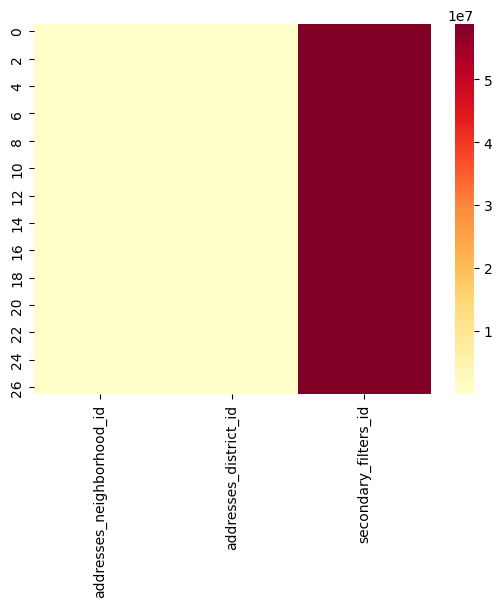

In [112]:
heatmap = sns.heatmap(df_heatmap, cmap='YlOrRd')

# Mostrar el mapa de calor
plt.show()

In [56]:
df_centres_comercials_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         46 non-null     object 
 1   addresses_road_name          46 non-null     object 
 2   addresses_neighborhood_name  46 non-null     object 
 3   addresses_district_name      46 non-null     object 
 4   addresses_zip_code           46 non-null     int64  
 5   geo_epgs_4326_x              46 non-null     float64
 6   geo_epgs_4326_y              46 non-null     float64
dtypes: float64(2), int64(1), object(4)
memory usage: 2.6+ KB


In [113]:
df_centres_comercials_f.head()

,name,addresses_road_name,addresses_neighborhood_name,addresses_district_name,addresses_zip_code,geo_epgs_4326_x,geo_epgs_4326_y
0,Centre Comercial Som Multiespai,Av Rio de Janeiro,Porta,Nou Barris,8016,41.435125,2.181042
1,Centre Comercial Diagonal Mar,Av Diagonal,Diagonal Mar i el Front Marítim del Poblenou,Sant Martí,8019,41.410457,2.216423
2,Hipermercat Carrefour *Glòries,Av Diagonal,el Parc i la Llacuna del Poblenou,Sant Martí,8018,41.404976,2.192521
3,Centre Comercial L'Illa Diagonal,Av Diagonal,les Corts,Les Corts,8029,41.389746,2.135396
4,Centre Comercial Westfield Glòries,Av Diagonal,el Parc i la Llacuna del Poblenou,Sant Martí,8018,41.404976,2.192521


In [120]:
df_centres_comercials_f.value_counts('addresses_neighborhood_name')

addresses_neighborhood_name
la Dreta de l'Eixample                          4
les Corts                                       4
el Barri Gòtic                                  3
el Bon Pastor                                   3
el Parc i la Llacuna del Poblenou               3
Diagonal Mar i el Front Marítim del Poblenou    2
Porta                                           2
la Marina de Port                               2
la Nova Esquerra de l'Eixample                  2
la Sagrera                                      1
la Vila Olímpica del Poblenou                   1
Name: count, dtype: int64

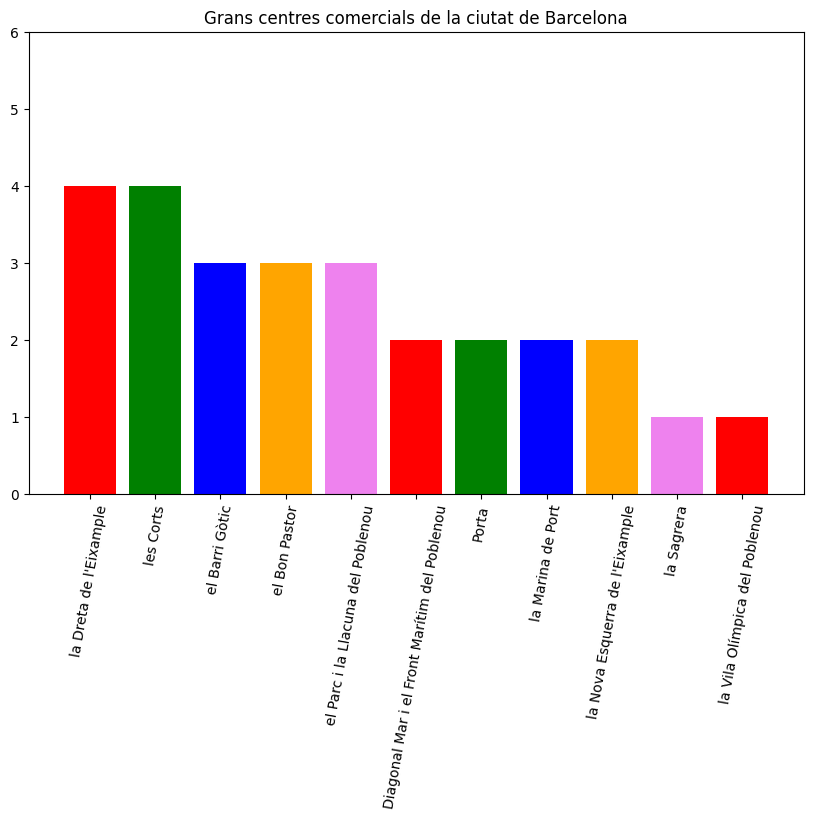

In [156]:
x = df_centres_comercials_f.value_counts('addresses_neighborhood_name').index
y = df_centres_comercials_f.value_counts('addresses_neighborhood_name')

fig = plt.figure(figsize=(10, 6))
colores = ['red', 'green', 'blue', 'orange', 'violet']

plt.bar(x, y,
        width=0.8,
        color = colores)

plt.xticks(rotation=80)  # Rota los nombres del eje x en 90 grados


plt.title('Grans centres comercials de la ciutat de Barcelona')
plt.ylim(0, 6)
plt.show()

In [149]:
plt.savefig('centros_comerciales.png')


<Figure size 640x480 with 0 Axes>

In [115]:
df.describe()

,institution_id,institution_name,addresses_roadtype_id,addresses_roadtype_name,addresses_road_id,addresses_start_street_number,addresses_end_street_number,addresses_neighborhood_id,addresses_district_id,addresses_zip_code,addresses_type,values_id,values_attribute_id,secondary_filters_id,secondary_filters_tree,secondary_filters_asia_id,geo_epgs_25831_x,geo_epgs_25831_y,geo_epgs_4326_x,geo_epgs_4326_y
count,0.0,0.0,0.0,0.0,27.000000,27.000000,0.0,27.000000,27.000000,27.000000,0.0,27.000000,27.000000,27.0,27.0,2.700000e+01,27.000000,2.700000e+01,27.000000,27.000000
mean,NaN,NaN,NaN,NaN,283938.888889,180.925926,NaN,32.777778,5.518519,8019.333333,NaN,170949.148148,20002.518519,58731071.0,651.0,6.510301e+13,430849.273221,4.583412e+06,41.399268,2.172768
std,NaN,NaN,NaN,NaN,229216.371572,204.745607,NaN,26.628980,3.609500,12.089410,NaN,35178.678640,1.847459,0.0,0.0,0.000000e+00,2193.748476,2.707938e+03,0.024511,0.026042
min,NaN,NaN,NaN,NaN,18505.000000,2.000000,NaN,2.000000,1.000000,8001.000000,NaN,129634.000000,20001.000000,58731071.0,651.0,6.510301e+13,427089.605633,4.578830e+06,41.357767,2.127937
25%,NaN,NaN,NaN,NaN,144601.000000,16.500000,NaN,8.000000,2.000000,8011.000000,NaN,135570.000000,20001.000000,58731071.0,651.0,6.510301e+13,428919.128135,4.581918e+06,41.385805,2.149975
50%,NaN,NaN,NaN,NaN,169409.000000,61.000000,NaN,19.000000,4.000000,8018.000000,NaN,174627.000000,20001.000000,58731071.0,651.0,6.510301e+13,430840.916253,4.582394e+06,41.389823,2.172847
75%,NaN,NaN,NaN,NaN,369408.000000,310.000000,NaN,60.000000,9.000000,8029.000000,NaN,201804.000000,20003.000000,58731071.0,651.0,6.510301e+13,432506.888609,4.584620e+06,41.410457,2.192521
max,NaN,NaN,NaN,NaN,701357.000000,617.000000,NaN,69.000000,10.000000,8039.000000,NaN,224334.000000,20006.000000,58731071.0,651.0,6.510301e+13,434510.209033,4.588198e+06,41.442562,2.216423


In [155]:
duplicados = df_centres_comercials_f.duplicated().sum()
print(duplicados)

0
